
Enter number of points for Monte Carlo estimate of Pi?
>10000

--------------

Result

Number of points inside cube of volume 4: 10000
Number of points inside unit sphere: 5277
Ratio unit sphere/full cube= 52.769999999999996 %

Estimated Volume of unit sphere = 0.5277 x Total Volume = 4.2216
Exact value (pi): 4.18879
% Error: 0.78328 %


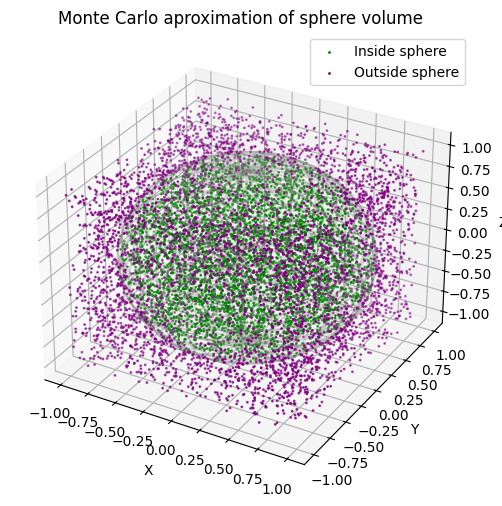

In [1]:
# -------------------------------------------------------------
# INTRODUCTION TO SIMULATION WITH PYTHON: Monte Carlo
# March 2018 Feb 2023 Example program by Jordi Faraudo Monte Carlo modified by Miriam Cegarra Cuquerella
# simulation for calculation of a sfere volume
# ------------------------------------------------------------- The algorithm is
# an implementation of Algorithm 1.1 from the book by W Krauth "Statistical
# Mechanics Algorithms and Computations" This is a classical example of a direct
# sampling Monte Carlo calculation

# Here we import the mathematical library and the plots library
import numpy as np
import matplotlib.pyplot as plt

# input total number of random points
total_random_points = int(input("\nEnter number of points for Monte Carlo estimate of Pi?\n>"))

# Init counter of number of points inside unit circle and inside unit square
inside_sphere = 0
inside_cube = 0

#Create list to save x,y of points inside circle to be shown in the graph
xc = []
yc = []
zc = []
#Create list to save x,y of points inside square but outside circle to be shown in the graph
xs = []
ys = []
zs = []
#---------------------------------------------------
#Calculation

while (inside_cube<total_random_points):

    #generate a random point
    x = np.random.uniform(-1.0, 1.0)
    y = np.random.uniform(-1.0, 1.0)
    z = np.random.uniform(-1.0, 1.0)

    #Update number of points inside cube
    inside_cube = inside_cube +1

    #check whether it is inside sphere (count and save for representation)
    if x**2 + y**2 + z**2<= 1.0:
        inside_sphere = inside_sphere +1
        xc.append(x)
        yc.append(y)
        zc.append(z)
    else:
        xs.append(x)
        ys.append(y)
        zs.append(z)

#---------------------------------------------------


#Number of points inside sphere as compared with total
sphere_ratio = inside_sphere /  inside_cube

#Number of points inside sphere as compared with those inside the total cube with volume 4.0
volume_approx = 8.0*sphere_ratio
exact_volume=(4/3)*np.pi

# Print output

print('\n--------------')
print('\nResult')
print('\nNumber of points inside cube of volume 4:', inside_cube)
print('Number of points inside unit sphere:',inside_sphere)
print('Ratio unit sphere/full cube=',sphere_ratio*100,'%')
print('\nEstimated Volume of unit sphere =',sphere_ratio,'x Total Volume =', volume_approx)
print('Exact value (pi):', round(exact_volume, 5))
print('% Error:' , round(abs(volume_approx - exact_volume) / exact_volume * 100, 5), '%')


#3D Graph
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(projection='3d')

#Inside sphere in green
ax.scatter(xc, yc, zc, color='green', s=1, label="Inside sphere")

#Inside cube in purple
ax.scatter(xs, ys, zs, color='purple', s=1, label="Outside sphere")

# Dibujamos una esfera de referencia con `plot_wireframe`
u, v = np.mgrid[0:2*np.pi:30j, 0:np.pi:20j]
sphere_x = np.cos(u) * np.sin(v)
sphere_y = np.sin(u) * np.sin(v)
sphere_z = np.cos(v)
ax.plot_wireframe(sphere_x, sphere_y, sphere_z, color="gray", alpha=0.3)

# Configuramos la gráfica
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
ax.set_title("Monte Carlo aproximation of sphere volume")
ax.legend()

plt.show()


In [35]:
# Here we import the mathematical library and the plots library
import numpy as np
import matplotlib.pyplot as plt

# input total number of random points
total_random_points = int(input("\nEnter number of points for Monte Carlo estimate of Pi?\n>"))

# Init counter of number of points inside unit circle and inside unit square
inside_circle = 0
inside_square = 0

#Create list to save x,y of points inside circle to be shown in the graph
xc = []
yc = []

#Create list to save x,y of points inside square but outside circle to be shown in the graph
xs = []
ys = []

#---------------------------------------------------
#Calculation

while (inside_square<total_random_points):

    #generate a random point
    x = np.random.uniform(-1.0, 1.0)
    y = np.random.uniform(-1.0, 1.0)

    #Update number of points inside square
    inside_square = inside_square +1

    #check whether it is inside circle (count and save for representation)
    if x**2 + y**2 <= 1.0:
        inside_circle = inside_circle +1
        xc.append(x)
        yc.append(y)
    else:
        xs.append(x)
        ys.append(y)

#---------------------------------------------------

# Statistics

# Number of points inside circle as compared with total
circle_ratio = inside_circle /  inside_square

#Number of points inside circle as compared with those inside the total square with area 4.0
pi_approx = 4.0*circle_ratio
error=((pi_approx-np.pi)/np.pi)*100

# Print output
print('\n--------------')
print('\nResult')
print('\nNumber of points inside square of area 4:', inside_square)
print('Number of points inside unit circle:',inside_circle,)
print('Ratio unit circle/full square=',circle_ratio*100,'% \n')
print('Estimated Area of unit circle =',circle_ratio,'x 4 =', pi_approx)
print('Exact value (pi):', np.pi)
print('Error in percentage:',round(error,5),'%')
print('\n--------------')



Enter number of points for Monte Carlo estimate of Pi?
>1000000

--------------

Result

Number of points inside square of area 4: 1000000
Number of points inside unit circle: 785911
Ratio unit circle/full square= 78.5911 % 

Estimated Area of unit circle = 0.785911 x 4 = 3.143644
Exact value (pi): 3.141592653589793
Error in percentage: 0.0653 %

--------------


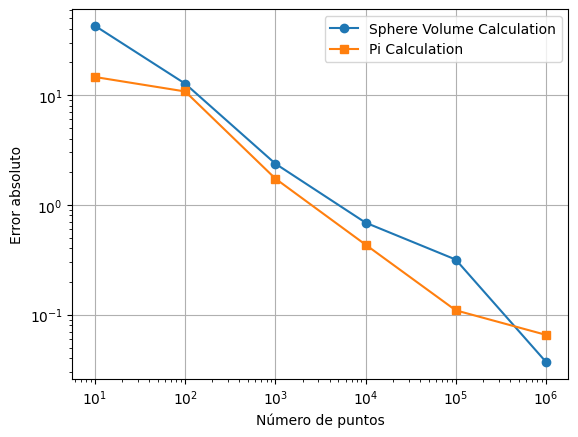

In [37]:
puntos = [10,100,1000,10000,100000,1000000]  #Number of points used
errores_codigo1 = [42.70422,12.6817,2.36846,0.68732,0.3168,0.03709]  #Sphere volume errors
errores_codigo2 = [14.59156,10.77184,1.73184,0.43314,0.10926,0.0653]  # Pi calculation errors

plt.loglog(puntos, errores_codigo1, 'o-', label='Sphere Volume Calculation')
plt.loglog(puntos, errores_codigo2, 's-', label='Pi Calculation')
plt.xlabel("Número de puntos")
plt.ylabel("Error absoluto")
plt.legend()
plt.grid()
plt.show()